# QC Notebook
## This notebook is an example: create a copy before running it or you will get merge conflicts!
This notebook can be run to compute and visualize the QC metrics for the run.

In [1]:
import sys
sys.path.append('../')

In [2]:
from datetime import datetime as dt
import os
import re
import pandas as pd
import natsort as ns

from toffy import qc_comp
from ark.utils import io_utils

### Define file parameters

- `run_name` should contain the exact name of the MIBI run to extract qc data from 
- `panel_path` should point to a panel csv specifying the targets on your panel. For an example, see the [example panel file](https://github.com/angelolab/toffy/blob/main/files/example_panel_file.csv)

In [ ]:
# the name of the run
run_name = 'YYYY-MM-DD_run_name'

# path to user panel
panel_path = 'C:\\Users\\Customer.ION\\Documents\\panel_files\\my_cool_panel.csv'

# path where plots will get saved
bin_file_path = os.path.join('D:\\Data', run_name)
extracted_imgs_path = os.path.join('D:\\Extracted_Images', run_name)
qc_out_dir = os.path.join('C:\\Users\\Customer.ION\\Documents\\run_metrics', run_name)

# make qc_dir if it doesn't exist
if not os.path.exists(qc_out_dir):
    os.mkdir(qc_out_dir)

### Create QC metric tables

Set the following parameters for running QC metric analysis:

* `gaussian_blur`: set to `True` if a Gaussian blur is desired
* `blur_factor`: define the standard deviation of the Gaussian kernel. Higher values are more aggressive in smoothing signal. Ignored if `gaussian_blur` is `False`.

In [4]:
gaussian_blur = True
blur_factor = 1

In [ ]:
# retrieve all the fov names from the extracted images directory
fovs = io_utils.list_folders(extracted_imgs_path)
if 'stitched_images' in fovs:
    fovs.remove('stitched_images')

# run QC metric extraction on each fov that doesn't have QC metric files defined
# saves directly to bin_file_path
for fov in ns.natsorted(fovs):
    # NOTE: if nonzero_mean_stats.csv doesn't exist, the other QC metric .csv paths also don't exist
    if not os.path.exists(os.path.join(bin_file_path, '%s_nonzero_mean_stats.csv' % fov)):
        print("Extracting QC metrics for fov %s" % fov)
        qc_comp.compute_qc_metrics(
            bin_file_path,
            extracted_imgs_path,
            fov,
            gaussian_blur=gaussian_blur,
            blur_factor=blur_factor
        )

### Visualize QC metrics

NOTE: the x-axis (FOV labels) of each graph is ordered in the FOV acquisition order.

In [10]:
# prior to generating the graphs, need to combine the QC metrics for each FOV into one combined .csv
qc_comp.combine_qc_metrics(bin_file_path)

In [ ]:
# visualize the non-zero mean intensity stats
df_nonzero_mean = pd.read_csv(os.path.join(bin_file_path, 'combined_nonzero_mean_stats.csv'))

qc_comp.visualize_qc_metrics(
    df_nonzero_mean,
    'Non-zero mean intensity',
    axes_size=16,
    wrap=6,
    dpi=None,
    save_dir=qc_out_dir
)

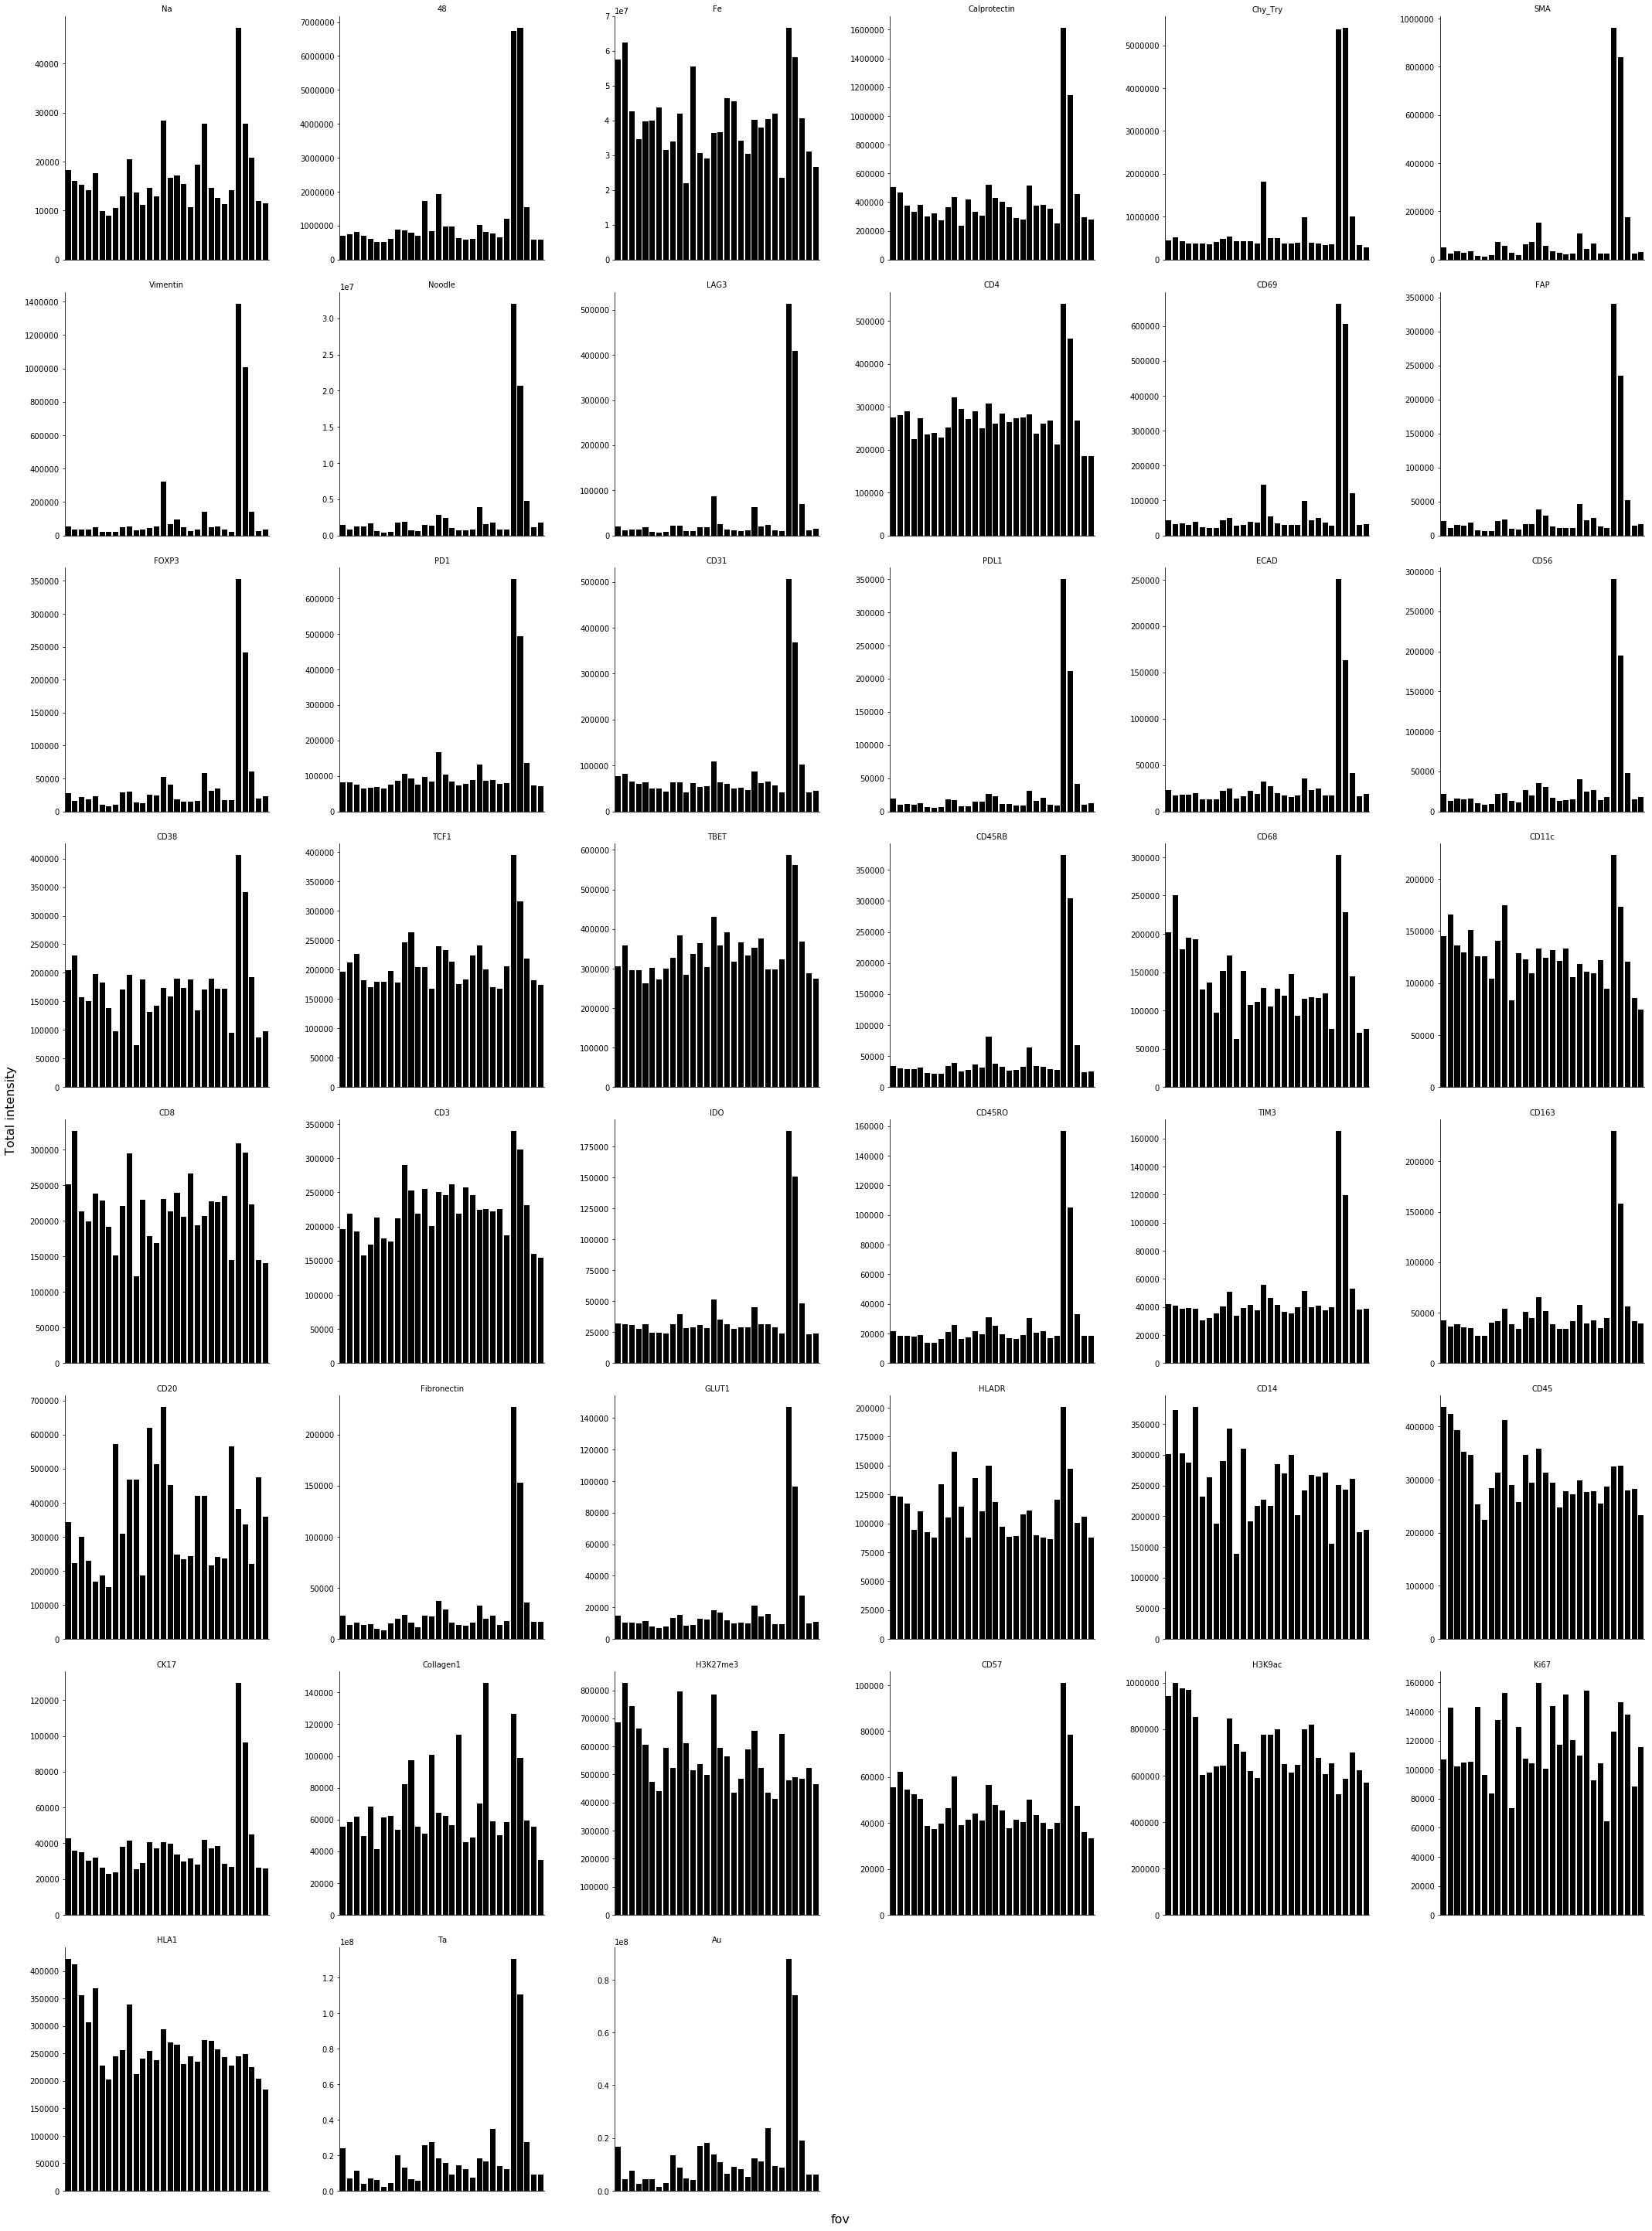

In [13]:
# visualize the total intensity stats
df_total_intensity = pd.read_csv(os.path.join(bin_file_path, 'combined_total_intensity_stats.csv'))

qc_comp.visualize_qc_metrics(
    df_total_intensity,
    'Total intensity',
    axes_size=16,
    wrap=6,
    dpi=None,
    save_dir=qc_out_dir
)

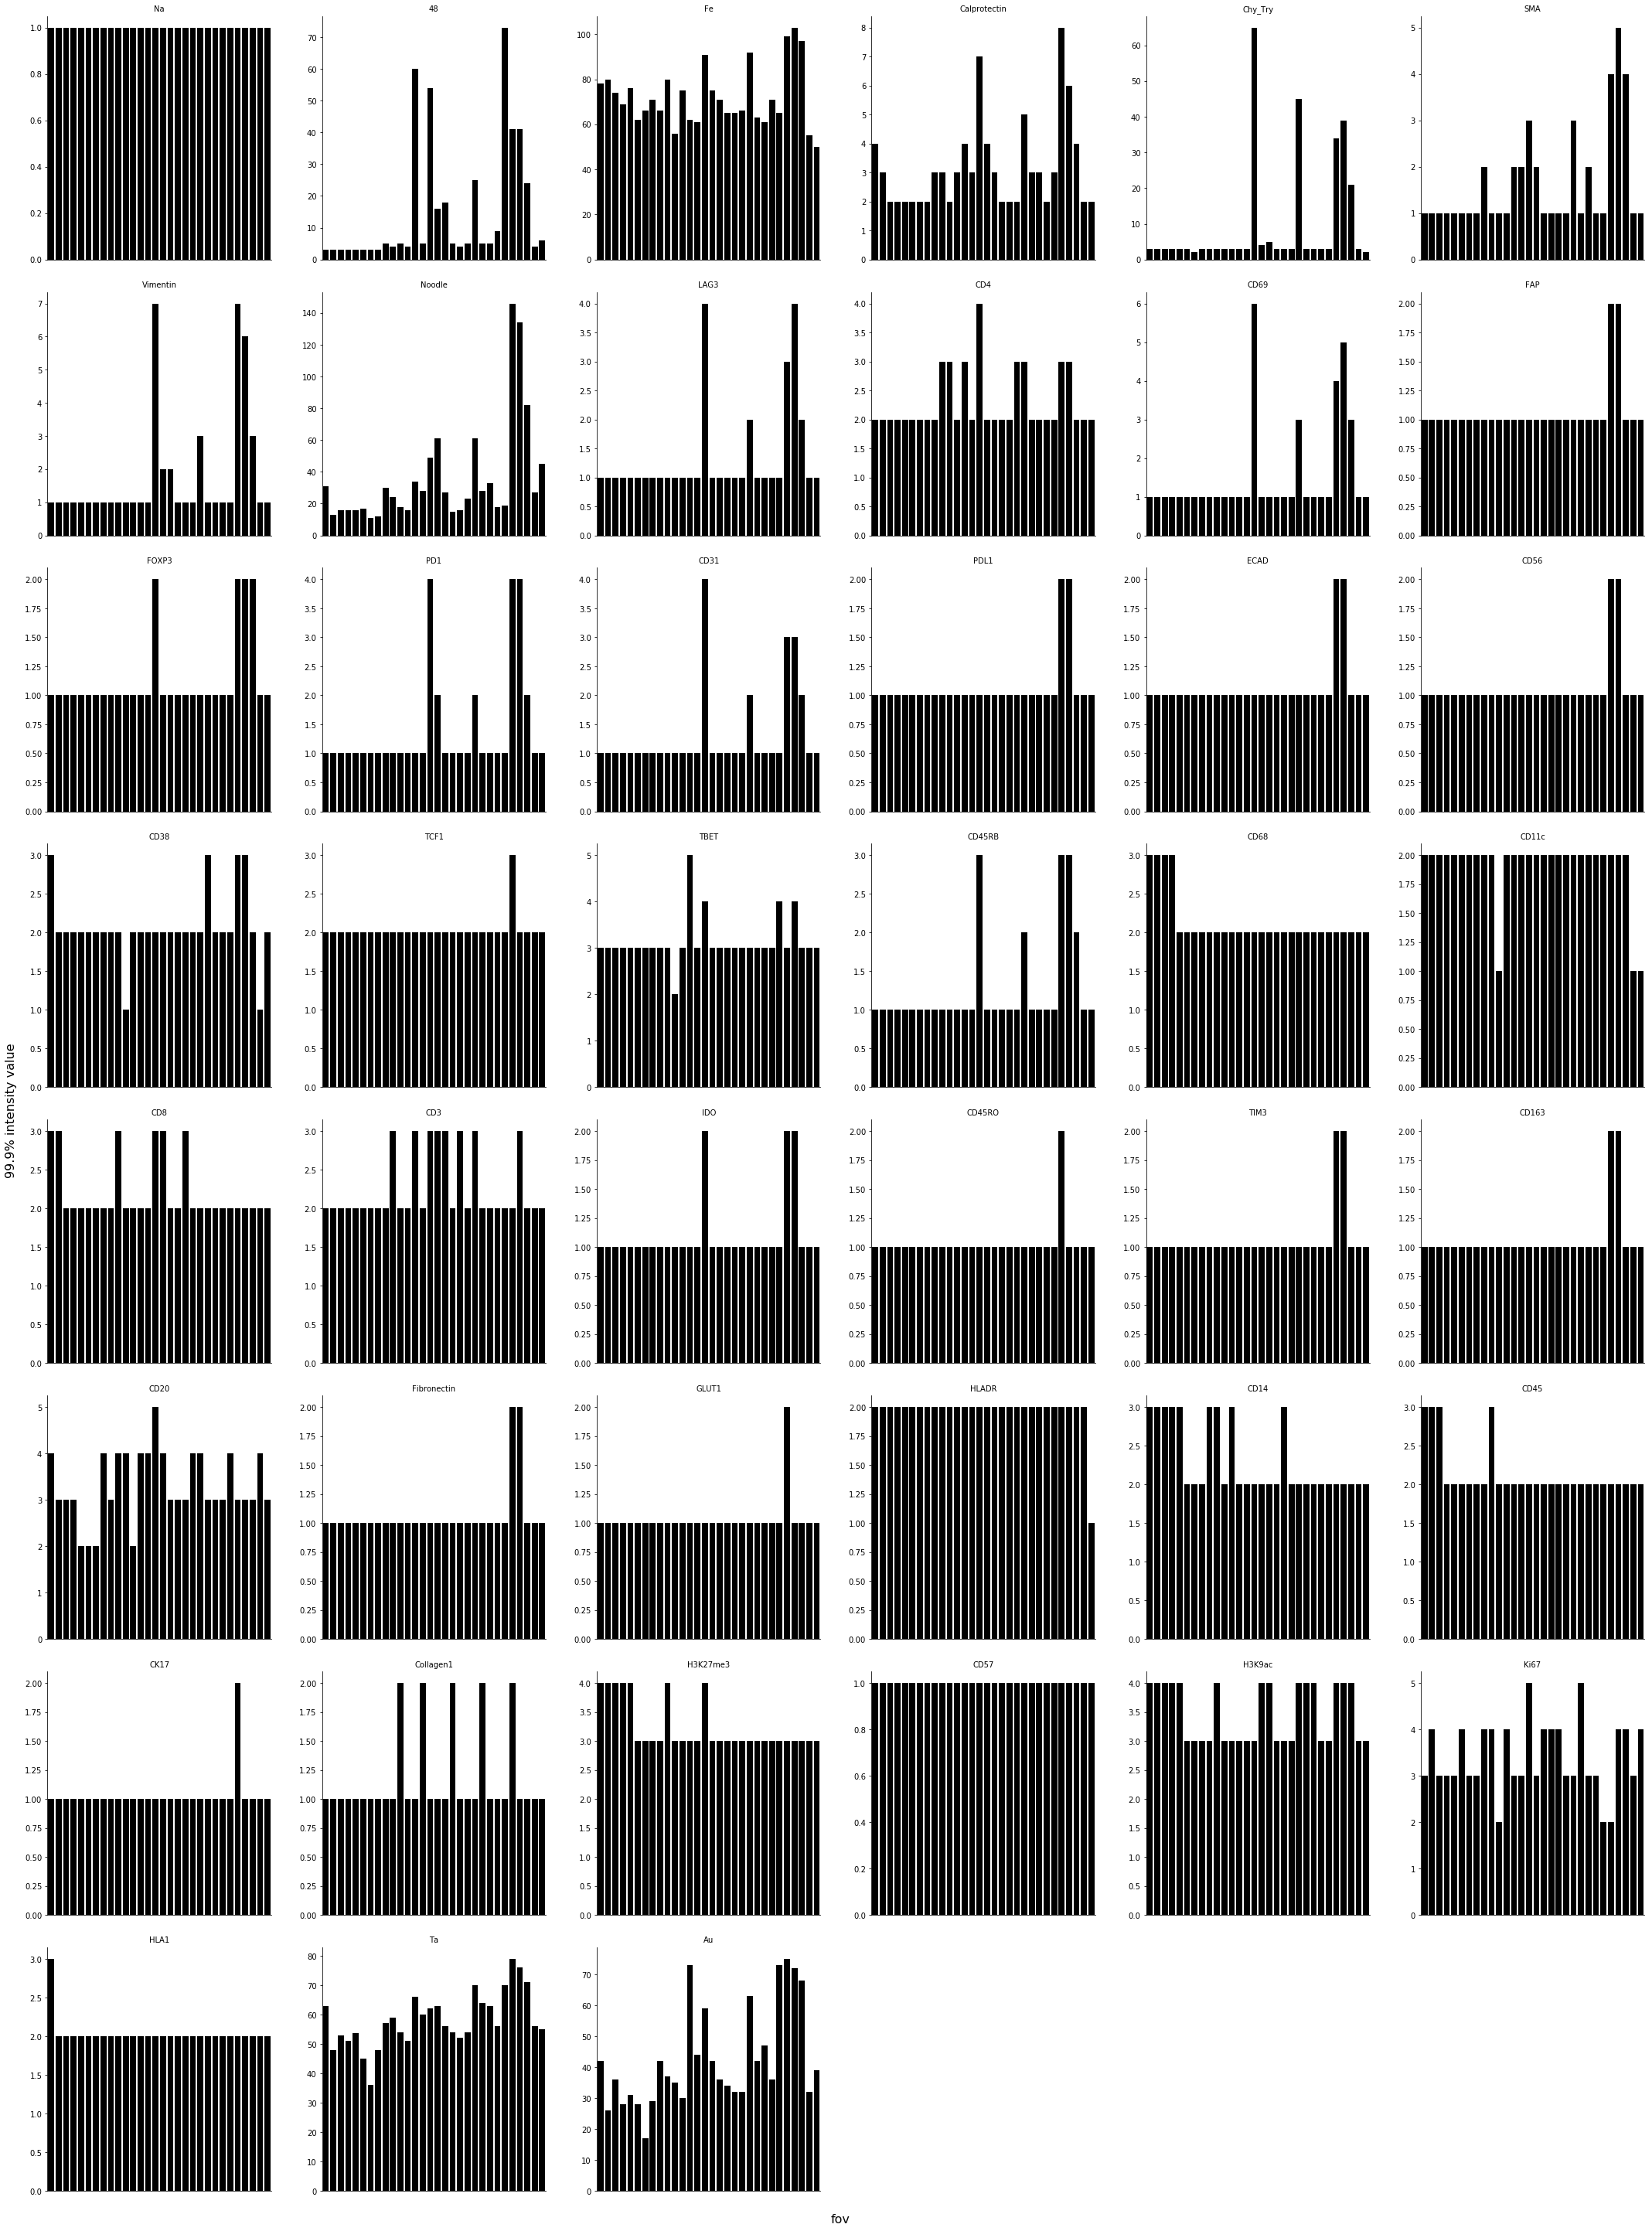

In [14]:
# visualize the 99.9% intensity value stats
df_99_9_intensity = pd.read_csv(os.path.join(bin_file_path, 'combined_percentile_99_9_stats.csv'))

qc_comp.visualize_qc_metrics(
    df_99_9_intensity,
    '99.9% intensity value',
    axes_size=16,
    wrap=6,
    dpi=None,
    save_dir=qc_out_dir
)